In [17]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# loading data
import os
def load_data(path):
    # point to the data set directory and choose the file to load
    p = path
    os.chdir(p) 

    #choose a data set
    while True:
        files = []
        with os.scandir(p) as dir:
            for count,entry in enumerate(dir):
                print(f"{count}) {entry.name}")
                files.append(entry.name)




        data = int(input('Enter the file index: '))
        data = os.path.join(p,files[data])
        if not data.endswith('.csv'):
            p = data
            print("\nThis is a directory\n")
        else:
            print(data)
            break
            
    return data

path = r'E:\Documents\Data\Datasets'

In [2]:
x = load_data(path)
y = load_data(path)

0) ArXiv_old.csv
1) mbti_1.csv
2) news.csv
3) US_Accidents_Dec19.csv
4) cannabis.csv
5) r_dataisbeautiful_posts.csv
6) deepnlp
7) fake-and-real-news-dataset
8) game-of-thrones-srt
9) books.csv
10) graduate-admissions
11) Islander_data.csv
12) mushrooms.csv
13) netflix_titles.csv
14) news-headlines-dataset-for-sarcasm-detection
15) AB_NYC_2019.csv
16) winequality-red.csv
17) StudentsPerformance.csv
18) ted-talks
19) young-people-survey
20) diamonds.csv
21) fake_job_postings.csv
22) developer_survey_2019
23) ETH_1h.csv.csv
24) Video 2020-04-17_2020-05-15 iCburks
25) Video 2013-04-06_2020-05-15 Gabe Flomo
26) Yelp Data
27) Udemy
28) NLP Data
29) FATAL ENCOUNTERS DOT ORG SPREADSHEET (See Read me tab) - Form Responses.csv
30) data-police-shootings-master
Enter the file index: 27

This is a directory

0) House Prices
1) selected_features.csv
Enter the file index: 0

This is a directory

0) data_description.txt
1) test.csv
2) train.csv
3) xtrain.csv
4) xtest.csv
Enter the file index: 3
E:\Doc

In [3]:
xtrain = pd.read_csv(x)
xtest = pd.read_csv(y)
xtrain.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.875000,0.375,0.5,0.75,0.571429,0.777778,0.50,0.014706,0.049180,0.2,0.285714,0.857143,0.933333,0.25,0.00000,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.833333,0.018692,1.000000,0.75,0.430183,0.6,0.8,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,0.5,0.0,0.545455,0.75,0.5,0.8,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.416667,0.375,0.5,0.75,0.571429,0.444444,0.75,0.360294,0.049180,0.2,0.285714,0.571429,0.600000,0.50,0.03375,0.666667,0.75,0.4,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.833333,0.457944,0.666667,0.25,0.220028,0.6,0.8,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,0.5,0.0,0.636364,0.50,0.5,0.8,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.958333,0.375,0.5,1.00,0.571429,0.888889,0.50,0.036765,0.098361,0.6,0.285714,0.428571,0.400000,0.50,0.25750,1.000000,0.75,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.833333,0.046729,0.666667,0.50,0.406206,0.6,0.8,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,1.00,0.5,0.8,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.500000,0.375,0.5,0.75,0.571429,0.666667,0.50,0.066176,0.163934,0.2,0.285714,0.857143,0.933333,0.25,0.00000,0.666667,0.75,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.833333,0.084112,0.666667,0.50,0.362482,0.6,0.8,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,0.5,0.0,0.636364,0.25,0.5,0.8,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.416667,0.375,0.5,0.75,0.571429,0.555556,0.50,0.323529,0.737705,0.2,0.285714,0.571429,0.666667,0.50,0.17000,0.333333,0.75,0.4,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.833333,0.411215,0.666667,0.50,0.406206,0.6,0.8,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,0.5,0.0,0.545455,0.50,0.5,0.8,0.0,0.0,0.0


In [6]:
# capture the target
ytrain = xtrain['SalePrice']
ytest = xtest['SalePrice']

0      12.209188
1      11.798104
2      11.608236
3      12.165251
4      11.385092
         ...    
141    11.884489
142    12.287653
143    11.921718
144    11.598727
145    12.017331
Name: SalePrice, Length: 146, dtype: float64

In [7]:
# load the selected features
feat = load_data(path)

0) ArXiv_old.csv
1) mbti_1.csv
2) news.csv
3) US_Accidents_Dec19.csv
4) cannabis.csv
5) r_dataisbeautiful_posts.csv
6) deepnlp
7) fake-and-real-news-dataset
8) game-of-thrones-srt
9) books.csv
10) graduate-admissions
11) Islander_data.csv
12) mushrooms.csv
13) netflix_titles.csv
14) news-headlines-dataset-for-sarcasm-detection
15) AB_NYC_2019.csv
16) winequality-red.csv
17) StudentsPerformance.csv
18) ted-talks
19) young-people-survey
20) diamonds.csv
21) fake_job_postings.csv
22) developer_survey_2019
23) ETH_1h.csv.csv
24) Video 2020-04-17_2020-05-15 iCburks
25) Video 2013-04-06_2020-05-15 Gabe Flomo
26) Yelp Data
27) Udemy
28) NLP Data
29) FATAL ENCOUNTERS DOT ORG SPREADSHEET (See Read me tab) - Form Responses.csv
30) data-police-shootings-master
Enter the file index: 27

This is a directory

0) House Prices
1) selected_features.csv
Enter the file index: 1
E:\Documents\Data\Datasets\Udemy\selected_features.csv


In [50]:
features = pd.read_csv(feat, header = None)
features

,0
0,MSSubClass
1,MSZoning
2,Neighborhood
3,OverallQual
4,OverallCond
5,YearRemodAdd
6,BsmtQual
7,BsmtExposure
8,HeatingQC
9,CentralAir


In [13]:
# turn the feature series into a vector/list
features = [x for x in features[0]]
features += ['LotFrontage']
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'SaleCondition',
 'LotFrontage']

In [14]:
# select the features
xtrain = xtrain[features]
xtest = xtest[features]

# Regularised Linear Regression

In [15]:
# training the model
model = Lasso(alpha = .005, random_state = 0) # remember to set the random seed
model.fit(xtrain, ytrain)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

# Evaluating the model
remember we [log transformed](https://www.cebm.net/2019/03/logarithms-and-log-transformations-2/) the sale price

In order to get the true performance of the lasso we need to transform both the target and the predictions back to the original house price values.

Then we weill evaluate the model using the [mean squared error](https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/) and [root mean squared error](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e)

###### [np.exp() ](https://www.geeksforgeeks.org/numpy-exp-python/)
The exponential function is e^x where e is a mathematical constant called Euler's number, approximately 2.718281. This value has a close mathematical relationship with pi and the slope of the curve e^x is equal to its value at every point. np.exp() calculates e^x for each value of x in your input array.

In [18]:
pred = model.predict(xtrain)
print(f"train MSE: {mean_squared_error(np.exp(ytrain), np.exp(pred))}")
print(f"train RMSE: {sqrt(mean_squared_error(np.exp(ytrain),np.exp(pred)))}")
print()
pred = model.predict(xtest)
print(f"test MSE: {mean_squared_error(np.exp(ytest), np.exp(pred))}")
print(f"test RMSE: {sqrt(mean_squared_error(np.exp(ytest),np.exp(pred)))}")
print()
# since we log transformed the sale price we use np.exp to get the inverse
# of the log transform
print(f"Average House Price: {np.exp(ytrain).median()}")

train MSE: 1091703411.5283396
train RMSE: 33040.935391243685

test MSE: 1429747907.6633143
test RMSE: 37812.00745349702

Average House Price: 163000.00000000012


### Plotting the values of the house price vs what out model predicts

Text(0.5, 1.0, 'Evaluation of lasso predictions')

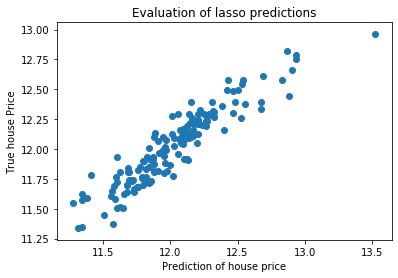

In [35]:
pred = model.predict(xtest)
plt.scatter(ytest, pred)
plt.ylabel('True house Price')
plt.xlabel('Prediction of house price')
plt.title('Evaluation of lasso predictions')

# Distribution of the errors
If our model is doing a good job, the distribution should look gaussian (normal)

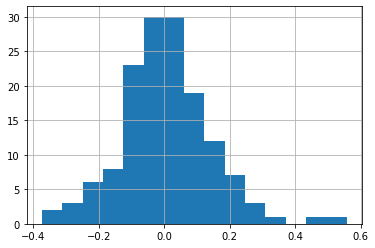

In [36]:
# errors = actual value - predicted value
errors = ytest - pred
errors.hist(bins=15)

# Plotting feature Importance
Feature importance for linear models is given by the magnitude of the coefficients (slope) for each feature. If a coefficient is 0, then that feature didnt add much value to the prediction of the model.

In [39]:
importance = pd.Series(np.abs(model.coef_.ravel()))
# setting the index as the feature labels
importance.index = features
importance

MSSubClass       0.018519
MSZoning         0.027711
Neighborhood     0.345614
OverallQual      0.440845
OverallCond      0.003966
YearRemodAdd     0.104276
BsmtQual         0.053122
BsmtExposure     0.071084
HeatingQC        0.004908
CentralAir       0.064738
1stFlrSF         0.110535
GrLivArea        0.734173
BsmtFullBath     0.057941
KitchenQual      0.112844
Fireplaces       0.046723
FireplaceQu      0.096947
GarageType       0.041828
GarageFinish     0.042191
GarageCars       0.166037
PavedDrive       0.002140
SaleCondition    0.004722
LotFrontage      0.000000
dtype: float64

Text(0.5, 1.0, 'Feature Importances')

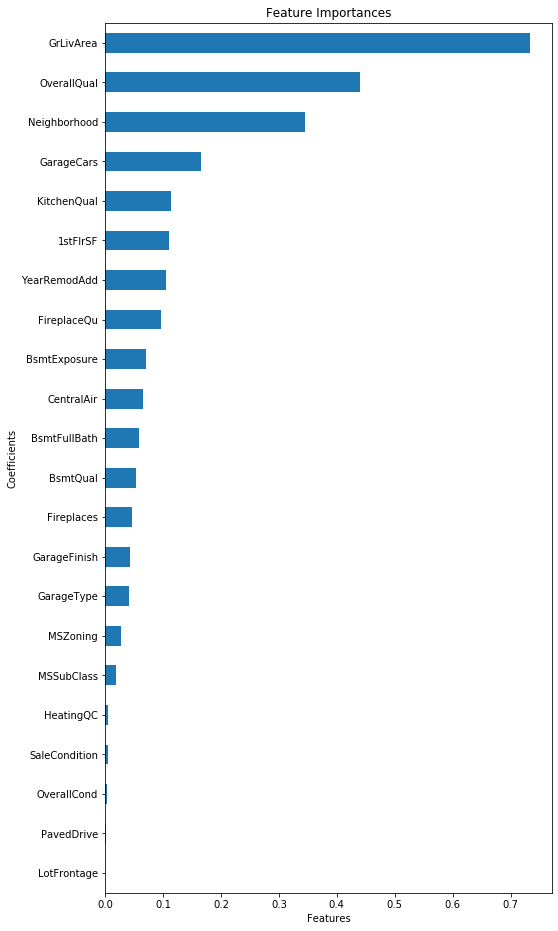

In [48]:
importance.sort_values(inplace = True, ascending = True)
importance.plot.barh(figsize = (8,16))
plt.ylabel("Coefficients")
plt.xlabel('Features')
plt.title('Feature Importances')